##### COG feature (Course Over Ground)

Shows the true trajectory of the vessel, taking into account wind and current. Measured in degrees from 0 to 360.

Default value is 360, meaning that cog was not available for the specific vessel at that timestamp.

Ideas:

- Replace default COG value (360) with an approximation based on Heading
- If Heading is not available, expraploate based on last known COG and perhaps next known COG

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2


In [4]:
train_df = pd.read_csv("../data/original_data/ais_train.csv", sep="|")

In [5]:
train_df["cog"].head()

0    284.0
1    109.6
2    111.0
3     96.4
4    214.0
Name: cog, dtype: float64

In [6]:
max_cog = train_df["cog"].max()
min_cog = train_df["cog"].min()
cog_count = train_df["cog"].count()
cog_unique_values_count = len(train_df["cog"].unique())
cog_default_value_count = len(train_df[train_df["cog"] == 360.0])

print(f"Max cog: {max_cog}")
print(f"Min cog: {min_cog}")
print(f"Count: {cog_count}")
print(f"Unique cog values: {cog_unique_values_count}")
print(f"Default cog value count: {cog_default_value_count}")


Max cog: 360.0
Min cog: 0.0
Count: 1522065
Unique cog values: 3601
Default cog value count: 5858


Chosen vessel ID: 61e9f440b937134a3c4c017d
['61e9f440b937134a3c4c017d']
time              2086
cog               2086
sog               2086
rot               2086
heading           2086
navstat           2086
etaRaw            2086
latitude          2086
longitude         2086
vesselId          2086
portId            2086
time_converted    2086
dtype: int64


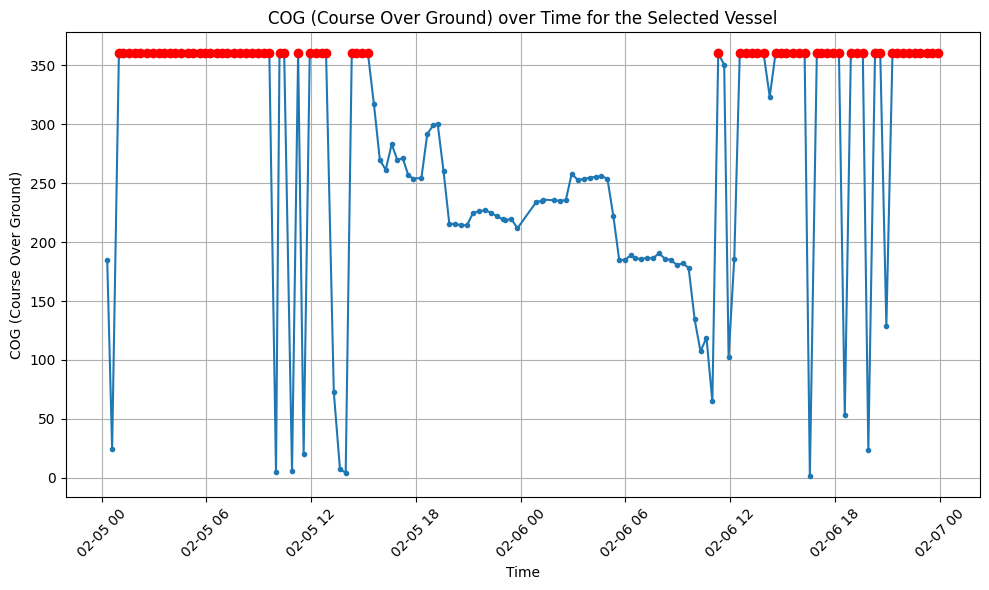

In [7]:
df_for_first_vessel = pd.DataFrame(train_df)

df_cog_360 = df_for_first_vessel[df_for_first_vessel['cog'] == 360.0]

vessel_id = df_cog_360.iloc[0,9]
print(f"Chosen vessel ID: {vessel_id}")

df_for_first_vessel = df_for_first_vessel[df_for_first_vessel["vesselId"] == vessel_id]

print(df_for_first_vessel["vesselId"].unique())

df_for_first_vessel['time_converted'] = pd.to_datetime(df_for_first_vessel['time'], errors='coerce')

print(df_for_first_vessel[df_for_first_vessel['cog'] == 360.0].count())
df_for_first_vessel_filtered = df_for_first_vessel[(df_for_first_vessel['time_converted'] < pd.to_datetime("2024-02-07")) & (df_for_first_vessel['time_converted'] > pd.to_datetime("2024-02-5"))]


df_red_points = df_for_first_vessel_filtered[df_for_first_vessel_filtered['cog'] == 360.0]

plt.figure(figsize=(10, 6))
plt.plot(df_for_first_vessel_filtered['time_converted'], df_for_first_vessel_filtered['cog'], marker='o', linestyle='-', markersize=3)
plt.scatter(df_red_points['time_converted'], df_red_points['cog'], color='red', label='COG = 360.0', zorder=5)


plt.title('COG (Course Over Ground) over Time for the Selected Vessel')
plt.xlabel('Time')
plt.ylabel('COG (Course Over Ground)')
plt.xticks(rotation=45) 
plt.grid(True)

plt.tight_layout()
plt.show()
